### Project -2 : Exploratory Data Analysis using Jupyter and Python3 for data set with Hypothesis

Data Source : https://data.cityofnewyork.us/api/views/7xq6-k6zy/rows.csv?accessType=DOWNLOAD



In [1]:
# Importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading Data from data source location with url path


data_url = "https://data.cityofnewyork.us/api/views/7xq6-k6zy/rows.csv?accessType=DOWNLOAD"
data = pd.read_csv(data_url)

### Understanding the Data

In [3]:
# Loading first five rows from Dataset

data.head()

,Appeal Type,Appeal Subtype,Agency,Status,Date Filed,Date Closed,Exam No.,Title,Expiration,Extension,Acronym
0,Waiting for DQ,NaN,Police Department - NYPD,Open,12/29/2017,NaN,NaN,NaN,NaN,NaN,NYPD
1,Section 50,Character,Police Department - NYPD,Open,12/29/2017,NaN,4316.0,Police Officer,08/24/2020,NaN,NYPD
2,Section 50,Score,Department of Citywide Administrative Services...,Open,12/28/2017,NaN,6508.0,Child Protective Specialist Supervisor,07/26/2021,NaN,DCAS
3,Section 50,Timeliness,Department of Citywide Administrative Services...,Open,12/28/2017,NaN,6012.0,Auto Mechanic,09/06/2021,NaN,DCAS
4,Section 50,Character,Police Department - NYPD,Open,12/28/2017,NaN,5329.0,Police Officer,07/07/2021,NaN,NYPD


In [4]:
# Loading last 5 rows from the Dataset

data.tail()

,Appeal Type,Appeal Subtype,Agency,Status,Date Filed,Date Closed,Exam No.,Title,Expiration,Extension,Acronym
1260,Section 50,Psych,Police Department - NYPD,Closed,01/03/2017,12/06/2017,3317.0,Police Officer,12/16/2019,NaN,NYPD
1261,Section 50,Medical,Fire Department - FDNY,Closed,01/03/2017,04/06/2017,2000.0,Firefighter,06/26/2017,NaN,FDNY
1262,Section 50,Timeliness,Department of Citywide Administrative Services...,Closed,01/03/2017,03/23/2017,6036.0,Public Health Sanitarian,12/07/2020,NaN,DCAS
1263,Section 50,Education and Experience,Department of Citywide Administrative Services...,Closed,01/03/2017,06/30/2017,5017.0,Computer Programmer Analyst Trainee,NaN,NaN,DCAS
1264,Section 50,Education and Experience,Department of Citywide Administrative Services...,Closed,01/03/2017,03/21/2017,6042.0,Construction Project Manager,NaN,NaN,DCAS


In [5]:
# Displaying the number of rows and columns prior to Data Cleaning

data.shape

(1265, 11)

In [6]:
# Implementing the describe() on the dataset

data.describe()

,Exam No.,Extension
count,1064.000000,0.0
mean,5321.635338,NaN
std,1626.870675,NaN
min,113.000000,NaN
25%,4310.000000,NaN
50%,5716.000000,NaN
75%,6524.000000,NaN
max,8213.000000,NaN


In [7]:
# number of distinct observations from each column in the Dataset

data.nunique()

Appeal Type         7
Appeal Subtype     14
Agency             22
Status              2
Date Filed        264
Date Closed       195
Exam No.          221
Title             144
Expiration        146
Extension           0
Acronym            22
dtype: int64

### Data Cleaning


Checking if there are any Null values or Missing values in the Dataset

In [8]:
# Retrieving the count of missing values from each column in the Dataset

data.isnull().sum()

Appeal Type          0
Appeal Subtype     162
Agency               0
Status               0
Date Filed           0
Date Closed        471
Exam No.           201
Title              201
Expiration         470
Extension         1265
Acronym              0
dtype: int64

In [9]:
# Dropping the below tables as they are not essential for the dataset and does not effect the final outcome

new_Data = data.drop(['Appeal Subtype','Date Closed','Exam No.','Title','Expiration','Extension'],axis=1)

In [10]:
# Analysing the data after data cleaning

new_Data.head()

,Appeal Type,Agency,Status,Date Filed,Acronym
0,Waiting for DQ,Police Department - NYPD,Open,12/29/2017,NYPD
1,Section 50,Police Department - NYPD,Open,12/29/2017,NYPD
2,Section 50,Department of Citywide Administrative Services...,Open,12/28/2017,DCAS
3,Section 50,Department of Citywide Administrative Services...,Open,12/28/2017,DCAS
4,Section 50,Police Department - NYPD,Open,12/28/2017,NYPD


In [11]:
# Checking for the null values after data cleaning 

new_Data.isnull().sum()

Appeal Type    0
Agency         0
Status         0
Date Filed     0
Acronym        0
dtype: int64

In [12]:
new_Data = new_Data.drop_duplicates(keep='first')

In [13]:
# Dimensions of Data after Data Cleaning

new_Data.shape

(834, 5)

In [14]:
new_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834 entries, 0 to 1262
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Appeal Type  834 non-null    object
 1   Agency       834 non-null    object
 2   Status       834 non-null    object
 3   Date Filed   834 non-null    object
 4   Acronym      834 non-null    object
dtypes: object(5)
memory usage: 39.1+ KB


### Hypothesis 1 : There are more appeals filed from Agency "Police Department - NYPD"?

In [15]:
#To prove the above hypothesis, chechking the count of appeals filed from each category

# creation of a new dataframe to store the values of column "Agency" and its count

Agency_df = pd.DataFrame(new_Data.Agency.value_counts().reset_index().values, columns=["Agency", "Agency Count"])
Agency_count = Agency_df.sort_index(axis = 0, ascending=True)
Agency_count

,Agency,Agency Count
0,Department of Citywide Administrative Services...,329
1,Police Department - NYPD,229
2,Department of Correction - DOC,100
3,Fire Department - FDNY,51
4,MTA New York City Transit - NYCT,34
5,Housing Authority - NYCHA,20
6,Department of Sanitation - DSNY,18
7,Transit Authority - NYCTA,13
8,Human Resources Administration - HRA,8
9,Administration for Children's Services - ACS,6


### Hypothesis-1 : Visualizations

 After per the numeric values from the above cell, 
 It is clear that Agency-"Department of Citywide Administrative Services" has more number of appeals.
 Therefore the hypothesis is false.


To make visualization more clear only top five Agency has been considered in the descending order of count.



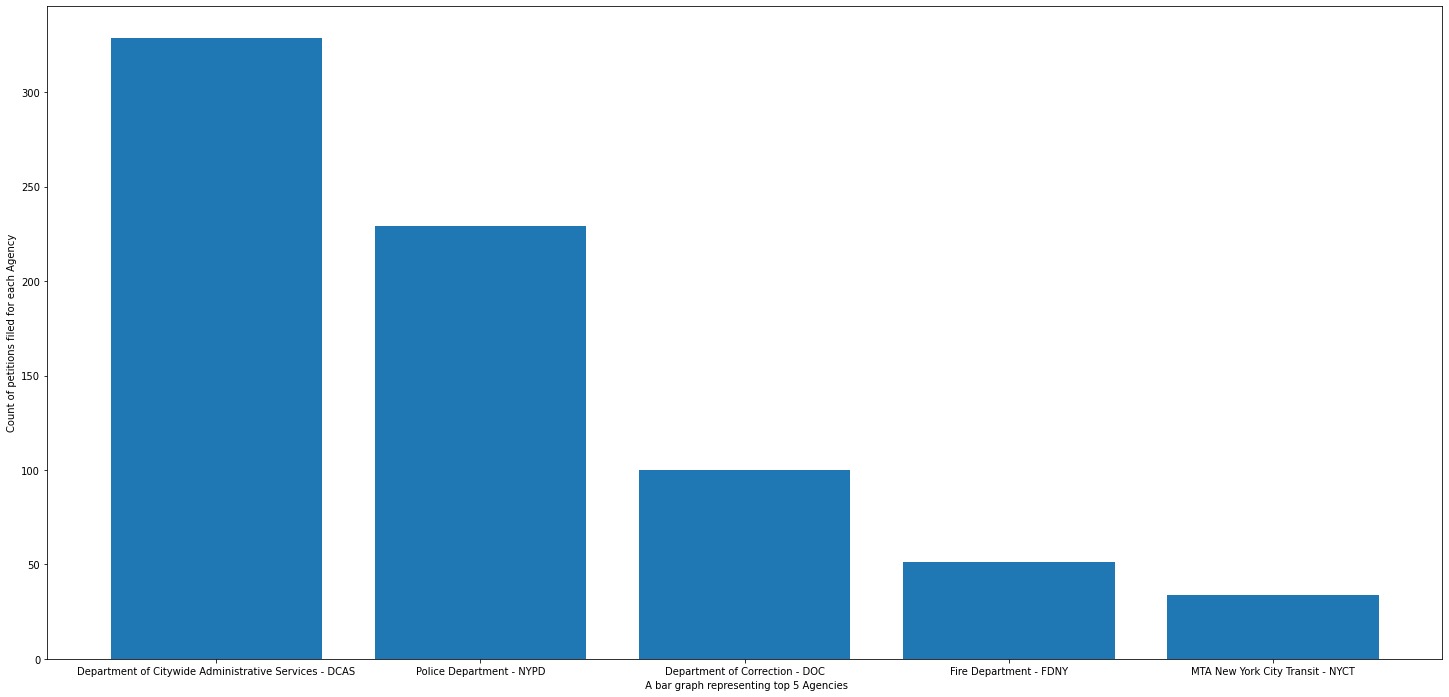

In [16]:
# Creating a bar graph to visualize the hypothesis - 1

# Considering only top 5 values based on highest count of appeals in descending order

Agency = Agency_count['Agency'].head(5)
count = Agency_count['Agency Count'].head(5)
 

fig = plt.figure(figsize =(25, 12))
 

plt.bar(Agency, count)

plt.xlabel(" A bar graph representing top 5 Agencies")
plt.ylabel("Count of petitions filed for each Agency")
 

plt.show()

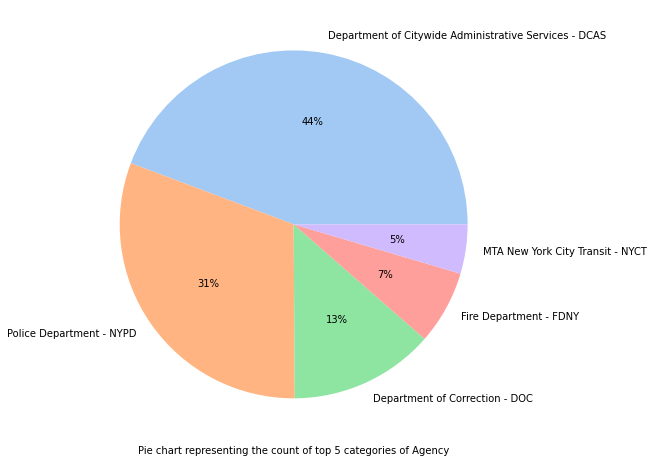

In [17]:
# Creating a pie chart to visualize the hypothesis - 1


# Considering only top 5 values based on highest count of appeals in descending order

Agency = Agency_count['Agency'].head(5)
count = Agency_count['Agency Count'].head(5)

# Figure Size

fig = plt.figure(figsize =(10, 8))
 

# defining Seaborn palette for color

colors = sns.color_palette('pastel')[0:5]

plt.xlabel("Pie chart representing the count of top 5 categories of Agency")

#creating pie chart
plt.pie(count, labels = Agency, colors = colors, autopct='%.0f%%')
plt.show()

### As per the above visuals it is clearly proven that hypothesis is proved as false and Agency "DCAS" has more appeals

### Hypothesis 2: The total number of appeals that are closed is more than appleals open?

In [18]:
# To prove the above hypothesis, checking the count of categories from the column status

# Creation of a new dataframe to store the values of column "Status" and its count

status_df = pd.DataFrame(new_Data.Status.value_counts().reset_index().values, columns=["Status", "Status Count"])
status_count = status_df.sort_index(axis = 0, ascending=True)
status_count

,Status,Status Count
0,Closed,521
1,Open,313


### Hypothesis-2 : Visualizations

 After per the numeric values from the above cell, 
 There are two categories in the column Status and to prove the hypothesis count of both catergories is retrieved.
 The value of closed category is more than open. Hence, the hypothesis is True.


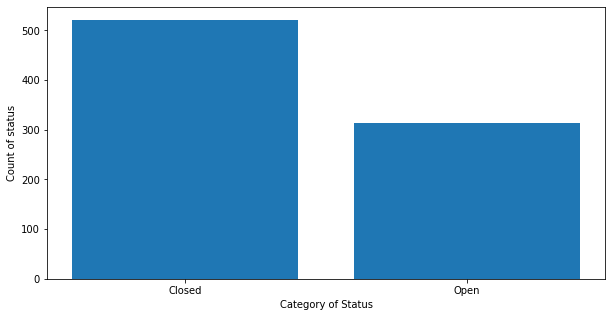

In [19]:
# Creating a Bar graph to visualize the hypothesis - 2

# Considering the values of column "Status" count with two factors namely "Closed" & "Open"

Status = status_count['Status']
count = status_count['Status Count']
 
# Figure Size
fig = plt.figure(figsize =(10, 5))
 
# Horizontal Bar Plot
plt.bar(Status, count)
plt.xlabel("Category of Status")
plt.ylabel("Count of status")
 
# Show Plot
plt.show()



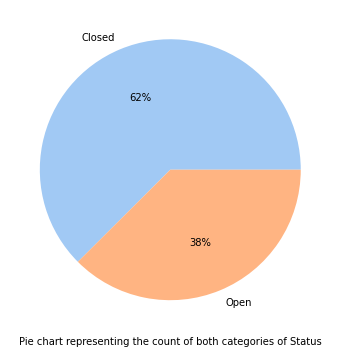

In [20]:
# Creating a pie chart to visualize the hypothesis - 2

# Considering the values of column "Status" count with two factors namely "Closed" & "Open"

Status = status_count['Status']
count = status_count['Status Count']
 
# Figure Size
fig = plt.figure(figsize =(8, 6))
 

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

plt.xlabel("Pie chart representing the count of both categories of Status")

#create pie chart
plt.pie(count, labels = Status, colors = colors, autopct='%.0f%%')
plt.show()

### As per the above visuals & numeric values, it is clearly proved that hypothesis is True.